In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn joblib


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib


In [12]:
df = pd.read_csv("student-mat.csv", sep=';')

# target: pass / fail
df['pass'] = (df['G3'] >= 10).astype(int)


In [13]:
numeric_features = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime',
    'failures', 'famrel', 'freetime', 'goout',
    'Dalc', 'Walc', 'health', 'absences'
]

categorical_features = [
    'school', 'sex', 'address', 'famsize', 'Pstatus',
    'Mjob', 'Fjob', 'reason', 'guardian',
    'schoolsup', 'famsup', 'paid', 'activities',
    'nursery', 'higher', 'internet', 'romantic'
]

selected_features = numeric_features + categorical_features


In [14]:
df_model = df[selected_features + ['pass']]

X = df_model.drop('pass', axis=1)
y = df_model['pass']


In [15]:
X.head()
X.columns.tolist()


['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [17]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

rf_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])


In [18]:
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6708860759493671

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35        26
           1       0.71      0.87      0.78        53

    accuracy                           0.67        79
   macro avg       0.60      0.57      0.56        79
weighted avg       0.64      0.67      0.64        79



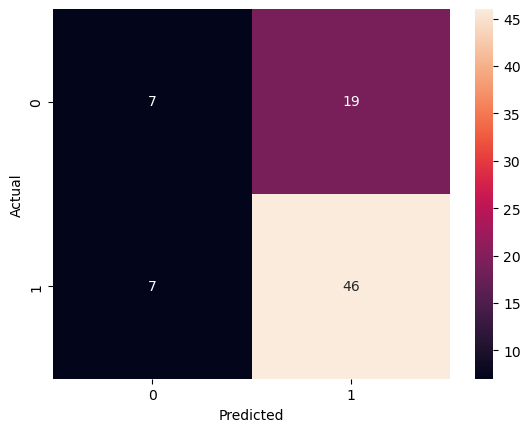

In [19]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
joblib.dump(rf_clf, "student_performance_model.joblib")
print("Model saved!")


Model saved!
